Data Analysis

One trend we can see is the total number of rides in each city type.  On one end, urban cities tend to have a high number of rides taken.  On the other end, rural cities tend to not take as many rides.  This is likely due to the volume of people in urban cities compared to rural ones.

Another trend we can see is the average fare in each city type.  On one end, urban cities have low average fares.  And on the other, rural cities tend to have high average fares.  This is likely due to the necessity for transportation, as people living in urban enviroments will likely not have their own car and instead will have to rely on secondary transport like trains or Pyber.  Rural enviroments are the opposite; most people will likely have their own car or other form of transortation so having secondary transportation will most of the time not be necessary.

Lastly, there is an average trend with total drivers in each city type.  Urban cities will tend to have high driver counts, with the exception of a few cities possibly having laws restricting the number of drivers and cause some cities to have low driver counts.  Rural cities will have a low number of drivers overall.  This is likely due to the amount of opportunity in each city. Depending on the city type, more people will want to be drivers to try and get more money.  Urban will have a lot because of the number of people needing secondary transport and rural will have a little because of the same reason.

In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_and_ride_data = pd.merge(ride_data, city_data, on = "city", how = "left")

# Display the data table for preview
city_and_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

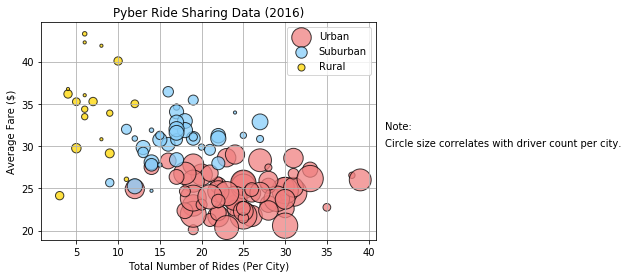

In [54]:
df = city_and_ride_data
urban_df = df.loc[df['type'] == "Urban",:]
suburban_df = df.loc[df['type'] == "Suburban",:]
rural_df = df.loc[df['type'] == "Rural",:]

# Obtain the x and y coordinates for each of the three city types
# X coordinates

total_rides_per_urban = []
total_rides_per_suburban = []
total_rides_per_rural = []

urban_cities = urban_df['city'].unique()
suburban_cities = suburban_df['city'].unique()
rural_cities = rural_df['city'].unique()

for city in urban_cities:
        
    total_rides = len(urban_df.loc[urban_df['city'] == city,:])
    total_rides_per_urban.append(total_rides)
    
for city in suburban_cities:
        
    total_rides = len(suburban_df.loc[suburban_df['city'] == city,:])
    total_rides_per_suburban.append(total_rides)
    
for city in rural_cities:
        
    total_rides = len(rural_df.loc[rural_df['city'] == city,:])
    total_rides_per_rural.append(total_rides)

# Y coordinates

average_fare_urban = []
average_fare_suburban = []
average_fare_rural = []

for city in urban_cities:
    
    total_rides_df = urban_df.loc[urban_df['city'] == city,:]
    average_fare = total_rides_df['fare'].mean()
    average_fare_urban.append(average_fare)
    
for city in suburban_cities:
    
    total_rides_df = suburban_df.loc[suburban_df['city'] == city,:]
    average_fare = total_rides_df['fare'].mean()
    average_fare_suburban.append(average_fare)

for city in rural_cities:
    
    total_rides_df = rural_df.loc[rural_df['city'] == city,:]
    average_fare = total_rides_df['fare'].mean()
    average_fare_rural.append(average_fare)
    
# Driver count per city

drivers_urban = []
drivers_suburban = []
drivers_rural = []

for city in urban_cities:
    
    drivers_df = urban_df.loc[urban_df['city'] == city, 'driver_count']
    total_drivers = drivers_df.iloc[0]
    drivers_urban.append(total_drivers)
    
for city in suburban_cities:
    
    drivers_df = suburban_df.loc[suburban_df['city'] == city, 'driver_count']
    total_drivers = drivers_df.iloc[0]
    drivers_suburban.append(total_drivers)
    
for city in rural_cities:
    
    drivers_df = rural_df.loc[rural_df['city'] == city, 'driver_count']
    total_drivers = drivers_df.iloc[0]
    drivers_rural.append(total_drivers)
    
# Bloat the driver counts for better visualization

drivers_urban_bloat = [drivers * 10 for drivers in drivers_urban]
drivers_suburban_bloat = [drivers * 10 for drivers in drivers_suburban]
drivers_rural_bloat = [drivers * 10 for drivers in drivers_rural]
    
# Build the scatter plots for each city types

plt.scatter(total_rides_per_urban, average_fare_urban, marker="o", facecolors="lightcoral", edgecolors="black",
            s=drivers_urban_bloat, alpha=0.75, label = "Urban")
plt.scatter(total_rides_per_suburban, average_fare_suburban, marker="o", facecolors="lightskyblue", edgecolors="black",
            s=drivers_suburban_bloat, alpha=0.75, label = "Suburban")
plt.scatter(total_rides_per_rural, average_fare_rural, marker="o", facecolors="gold", edgecolors="black",
            s=drivers_rural_bloat, alpha=0.75, label = "Rural")
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
plt.legend(loc = "best")

# Incorporate a text label regarding circle size
plt.text(42,32, "Note:")
plt.text(42,30, "Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("Pyber_Bubble_Plot.png")

# Show plot
plt.show()

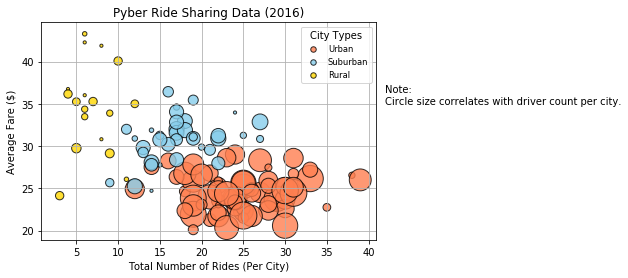

## Total Fares by City Type

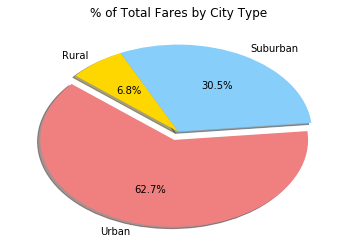

In [55]:
# Calculate Type Percents
# Total fares per city type and total fares overall

total_fares_urban = urban_df['fare'].sum()
total_fares_suburban = suburban_df['fare'].sum()
total_fares_rural = rural_df['fare'].sum()

total_fares = total_fares_urban + total_fares_suburban + total_fares_rural

# Percent of total fares per city type

percent_fares_urban = total_fares_urban / total_fares
percent_fares_suburban = total_fares_suburban / total_fares
percent_fares_rural = total_fares_rural / total_fares

# Put the values into a single list for use with the pie chart

percent_fares_data = [percent_fares_urban, percent_fares_suburban, percent_fares_rural]

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1,0,0)

plt.pie(percent_fares_data, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 140)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Pyber_Pie_Fares.png")
# Show Figure
plt.show()

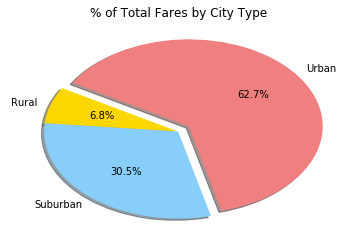

## Total Rides by City Type

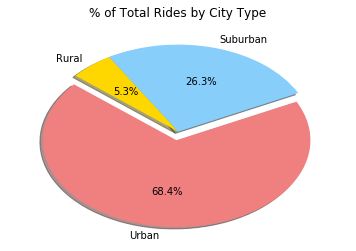

In [56]:
# Calculate Ride Percents
# Total rides per city type and total rides overall

total_rides_urban = sum(total_rides_per_urban)
total_rides_suburban = sum(total_rides_per_suburban)
total_rides_rural = sum(total_rides_per_rural)

overall_rides = total_rides_urban + total_rides_suburban + total_rides_rural

# Percent of total rides per city type

percent_rides_urban = total_rides_urban / overall_rides
percent_rides_suburban = total_rides_suburban / overall_rides
percent_rides_rural = total_rides_rural / overall_rides

# Put the values into a single list for use with the pie chart

percent_rides_data = [percent_rides_urban, percent_rides_suburban, percent_rides_rural]

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1,0,0)

plt.pie(percent_rides_data, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 140)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Pyber_Pie_Rides.png")
# Show Figure
plt.show()

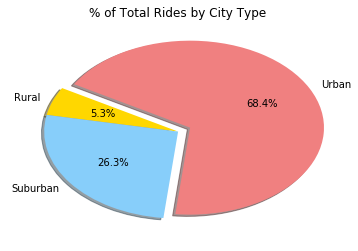

## Total Drivers by City Type

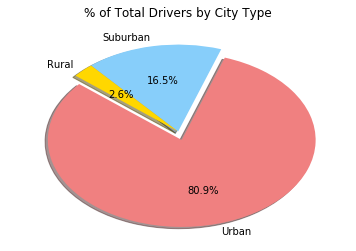

In [57]:
# Calculate Driver Percents
# Total drivers per city type and total drivers overall

total_drivers_urban = sum(drivers_urban)
total_drivers_suburban = sum(drivers_suburban)
total_drivers_rural = sum(drivers_rural)

overall_drivers = total_drivers_urban + total_drivers_suburban + total_drivers_rural

# Percent of total drivers per city type

percent_drivers_urban = total_drivers_urban / overall_drivers
percent_drivers_suburban = total_drivers_suburban / overall_drivers
percent_drivers_rural = total_drivers_rural / overall_drivers

# Put the values into a single list for use with the pie chart

percent_drivers_data = [percent_drivers_urban, percent_drivers_suburban, percent_drivers_rural]

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1,0,0)

plt.pie(percent_drivers_data, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 140)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Pyber_Pie_Drivers.png")
# Show Figure
plt.show()

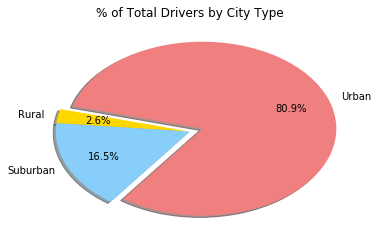